![](https://i.pinimg.com/564x/a5/62/c5/a562c5e39f084d61a97553183dede0c4.jpg)

# K-Nearest Neighbors (K-NN)

Kevin J. Walchko, Phd

23 Dec 2020

---

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. The algorithm assumes that similar things exist in close proximity to each other as shown below.

![](knn-pics/knn-plot.png)

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

At the bottom of this notebook, we will produce these plots of our data working on our trained model.

<table>
  <tr>
    <th>Training Dataset</th>
    <th>Test Dataset</th>
  </tr>
  <tr>
    <td><img src="knn-pics/training.png"></td>
    <td><img src="knn-pics/test.png"></td>
  </tr>
</table>


## References

- Machine Learning class on udemy.com
- wikipedia: [k-nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
- [Machine Learning Basics with the K-Nearest Neighbors Algorithm](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)

In [41]:
import numpy as np
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

## Importing the dataset

In [75]:
# dataset describing the age and salary of people who
# purchased something from an advertisement. The Purchased
# data is just binary signifying if a purchase was made.
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [76]:
# here we are removing the binary "Purchased" value
# because the results are meaningless for it
dataset[["Age","EstimatedSalary"]].describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [72]:
# so looking at the dataset, our independent variables (X) 
# are Age and Salary, while our dependent variable (Y) is
# did they purchase a product or not.
X = dataset.iloc[:, :-1].values # grab everything upto the last column
y = dataset.iloc[:, -1].values  # grab the last column

## Splitting the dataset into the Training set and Test set

In [43]:
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Mean values are: [   38.13 69583.33]


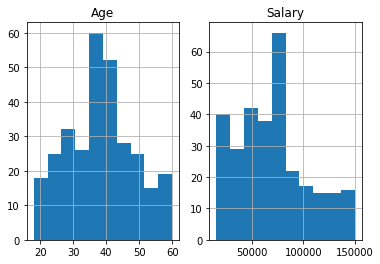

In [44]:
# print(X_train[:10,:]) # only print the first 10 rows ... too much otherwise!
mv = np.mean(x_train,axis=0)
print(f"Mean values are: {mv}")

plt.subplot(1,2,1)
plt.hist(x_train[:,0])
plt.grid(True)
plt.title("Age");

plt.subplot(1,2,2)
plt.hist(x_train[:,1])
plt.grid(True)
plt.title("Salary");

In [45]:
# note again, it is just binary output of:
#    0 - didn't purchase
#    1 - did purchase
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


## Feature Scaling

Below, we are going to scale the `x_train` and `x_test` datasets because the numbers within them are in completely different ranges. 

You might ask, "why don't we scale the y output" ... well look at it above. It is already scaled from \[0,1\] ... no need to do anything. If this data HAD other values (like \[-30,215\] for example) then we would have scaled it. 

In [46]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(X_test)

Mean values are: [0. 0.]


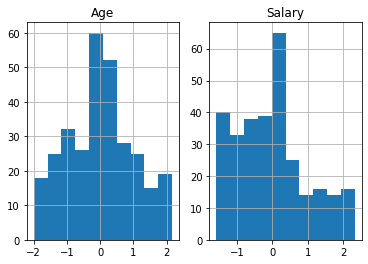

In [47]:
mv = np.mean(X_train,axis=0)
print(f"Mean values are: {mv}")

plt.subplot(1,2,1)
plt.hist(X_train[:,0])
plt.grid(True)
plt.title("Age");

plt.subplot(1,2,2)
plt.hist(X_train[:,1])
plt.grid(True)
plt.title("Salary");

## Training the K-NN model on the Training set

In [48]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting a new result

In [49]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Test set results

Here we are going to feed the test set into the model and see how it performs.

In [61]:
y_pred = classifier.predict(X_test)

In [67]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("-------------------")
print(f"True Positives (TP): {cm[0,0]}")
print(f"True Negatives (TN): {cm[1,1]}")
print(f"False Positives (FP): {cm[0,1]}")
print(f"False Negatives (FN): {cm[1,0]}")
print("-------------------")
print(f"Accuracy: {100*accuracy_score(y_test, y_pred)}%")

Confusion Matrix:
 [[64  4]
 [ 3 29]]
-------------------
True Positives (TP): 64
True Negatives (TN): 29
False Positives (FP): 4
False Negatives (FN): 3
-------------------
Accuracy: 93.0%


## Visualising the Training set results

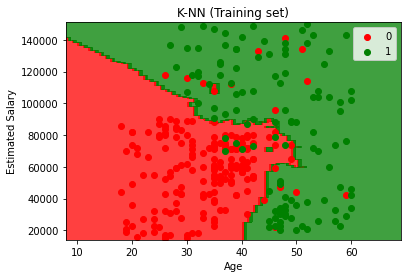

In [68]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

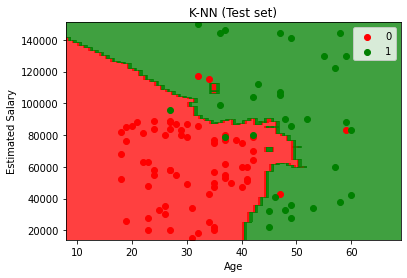

In [69]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()